# TS-ASAP: Smoothing

In [1]:
import matplotlib.pyplot as plt
from scipy.stats import kurtosis

In [2]:
from datetime import datetime

def to_datetime(token):
    return datetime.strptime(token, "%Y-%m-%d %H:%M:%S")

In [3]:
def get_moving_average(vals, window=3):
    ma_vals = []
    for i in range(window, len(vals)):
        x = vals[i-window+1:i+1]
        ma_vals.append(sum(x)/len(x))
    return ma_vals

In [35]:
def ts_asap(datafile, bottom=None, top=None, start=1, end=100, step=2, plot=None):
    if not plot:
        plot = []

    data = []
    with open(datafile, 'r') as f:
        for line in f.readlines()[1:]:
            data.append(line.strip().split(","))
    
    all_ts, all_vals = [], []
    for tokens in data:
        ts, value = to_datetime(tokens[0]), float(tokens[1])
        all_ts.append(ts)
        all_vals.append(value)

    plt.figure(figsize=(20,6))
    if bottom or top:
        plt.ylim(bottom=bottom, top=top)
    plt.title("Raw Plot", fontdict={'fontsize': 18})
    plt.plot(range(len(all_vals)), all_vals)
    
    max_kurt, best_window = -1000, 12
    for window in range(start, end, step):
        ma_vals = get_moving_average(all_vals, window=window)
        kurt = kurtosis(ma_vals)
        if kurt >= max_kurt:
            max_kurt, best_window = kurt, window
        if window in plot:
            plt.figure(figsize=(20,6))
            plt.title(f"Window Length {window}", fontdict={'fontsize': 18})
            plt.plot(range(len(ma_vals)), ma_vals)


    print("best window", best_window)
    ma_vals = get_moving_average(all_vals, window=best_window)
    plt.figure(figsize=(20,6))
    if bottom or top:
        plt.ylim(bottom=bottom, top=top)
    plt.title(f"Optimal Window Length {best_window}", fontdict={'fontsize': 18})
    plt.plot(range(len(ma_vals)), ma_vals)

best window 48


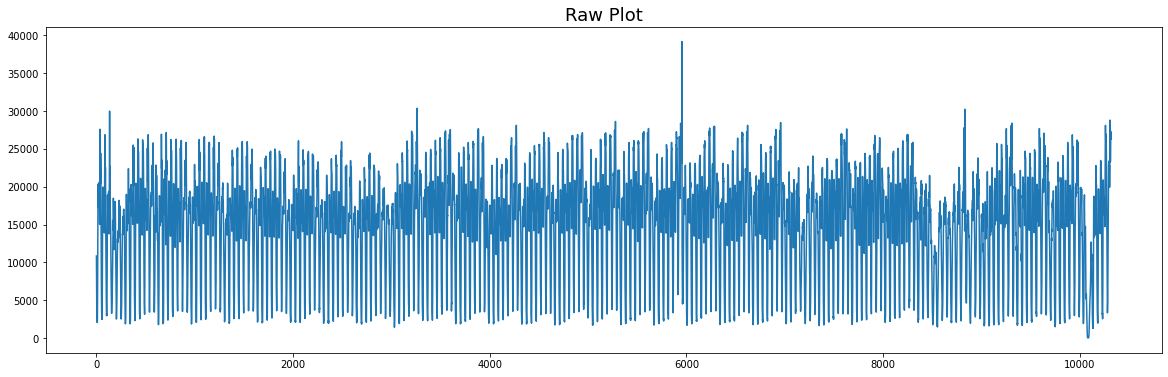

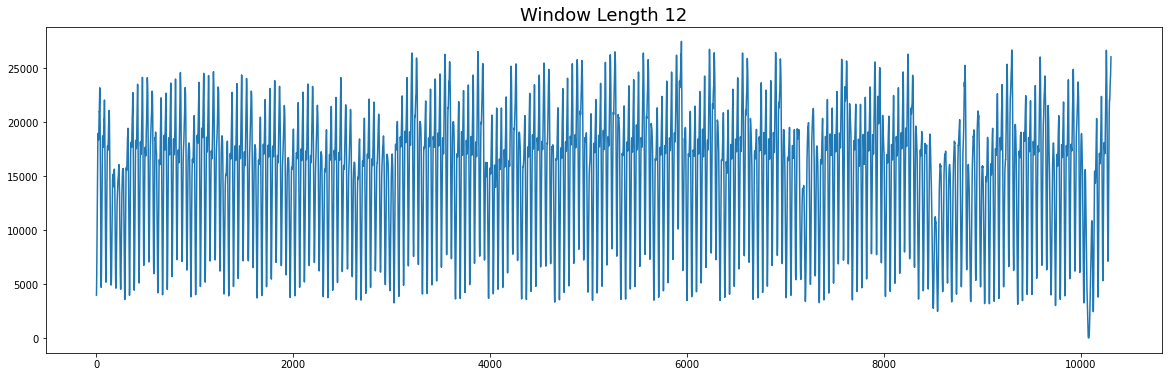

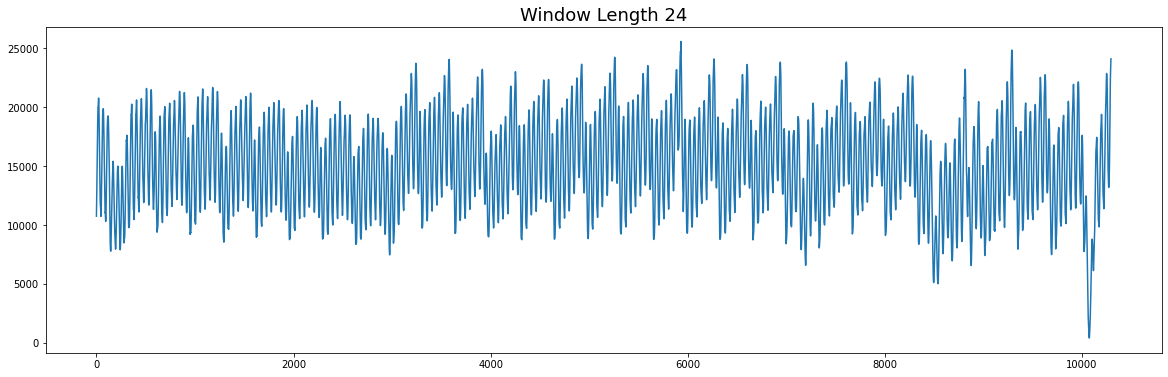

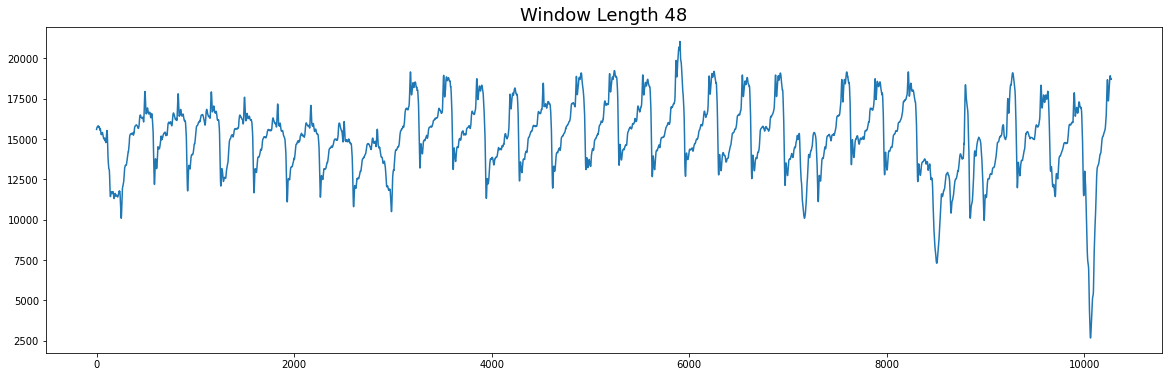

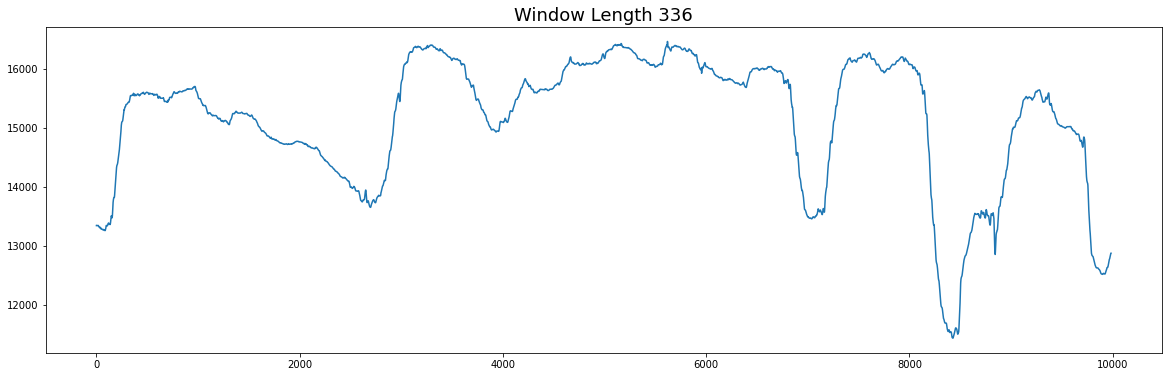

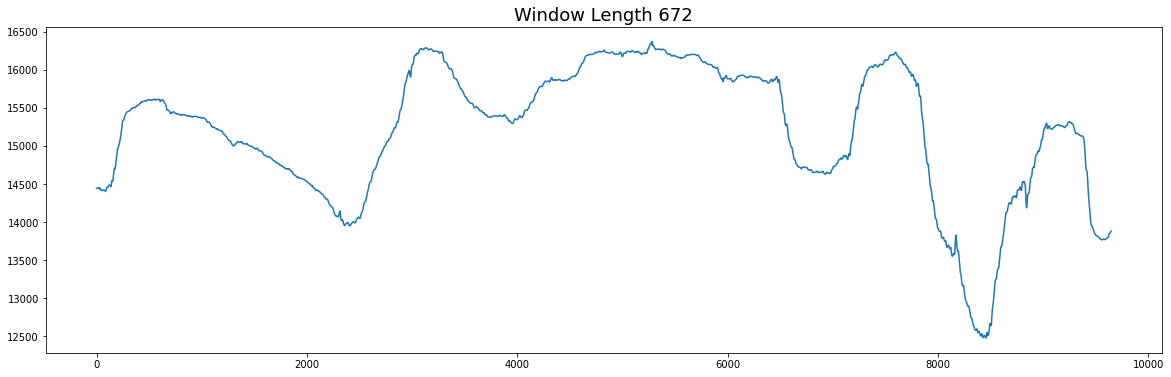

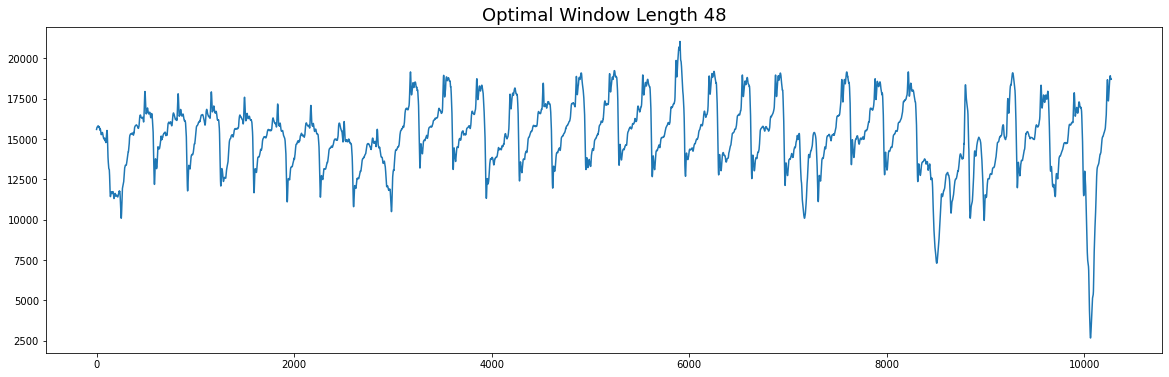

In [36]:
ts_asap('nyc_taxi.csv', start=12, end=1000, step=12, plot=[12, 24, 48, 48*7, 48*2*7, 48*2*7])

best window 2


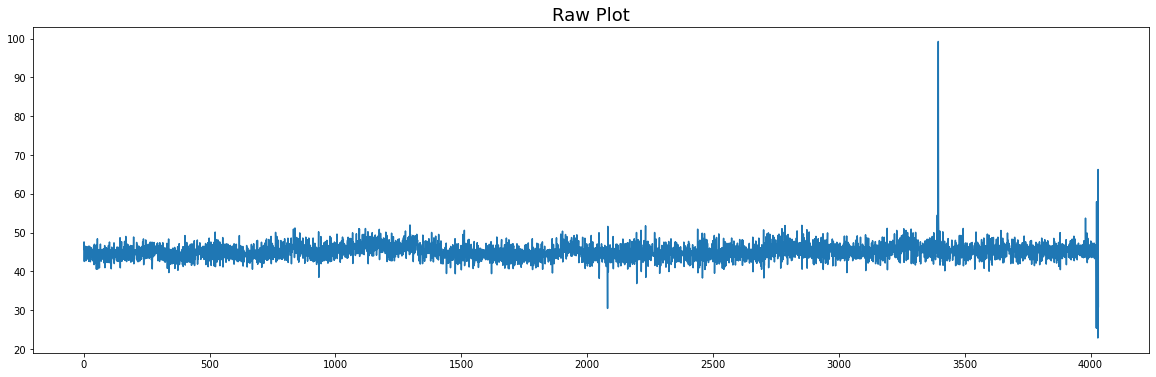

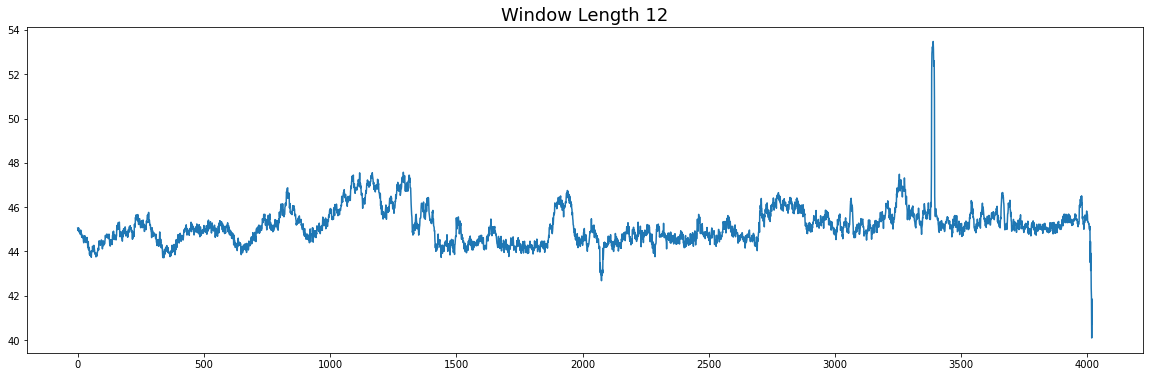

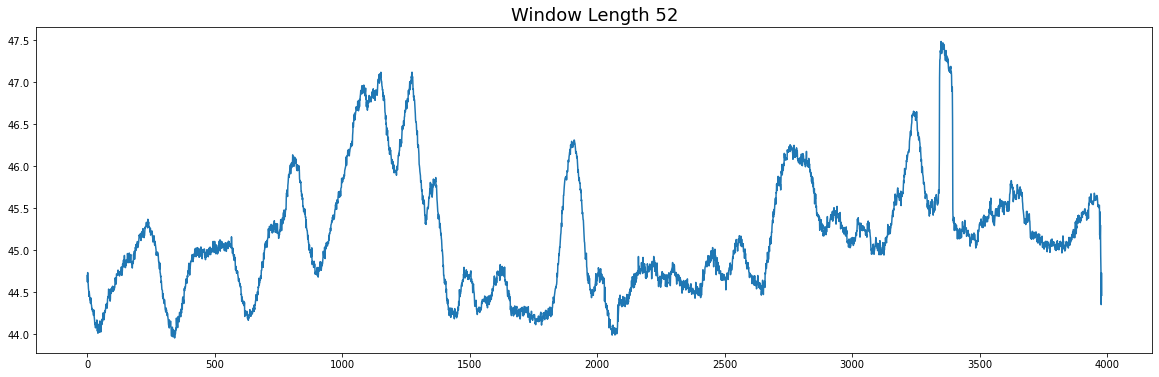

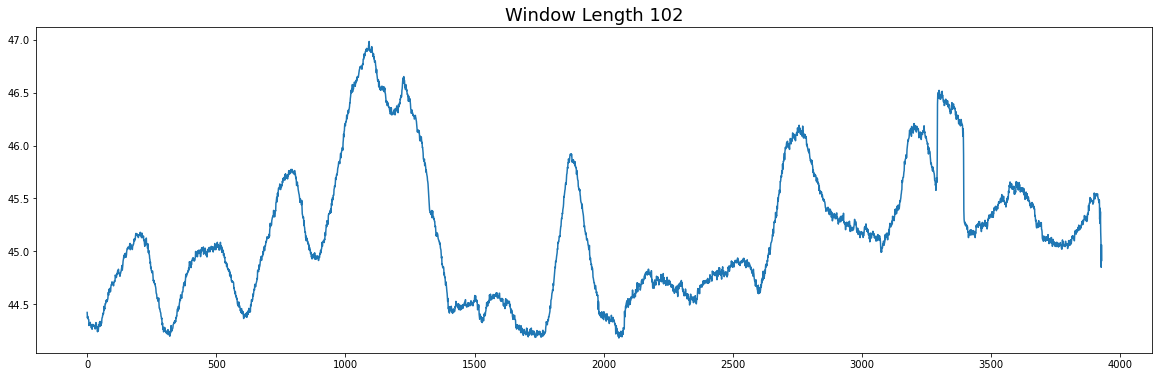

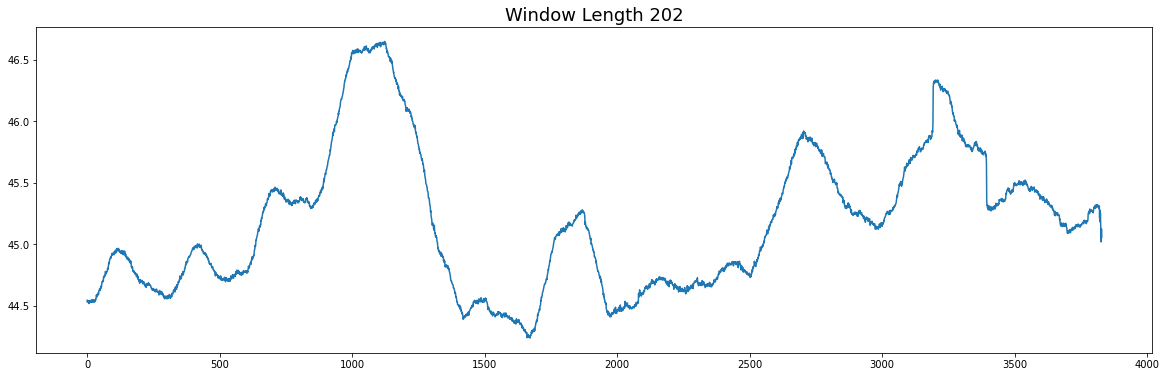

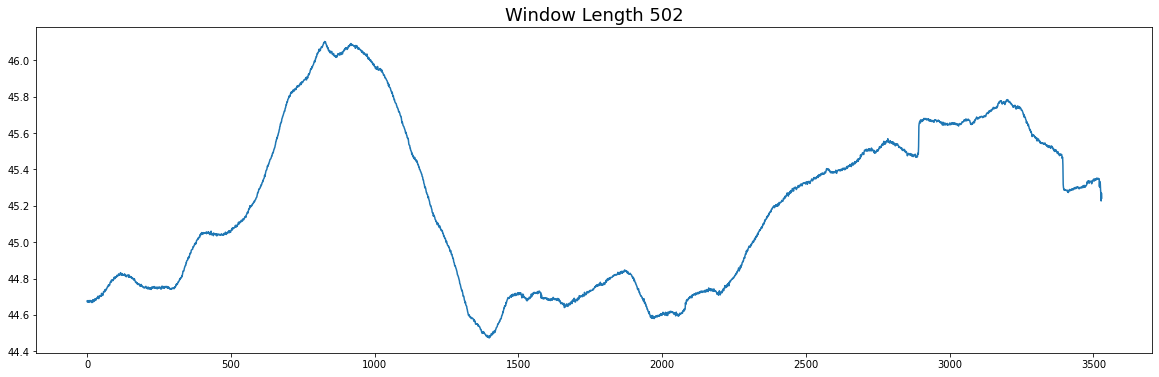

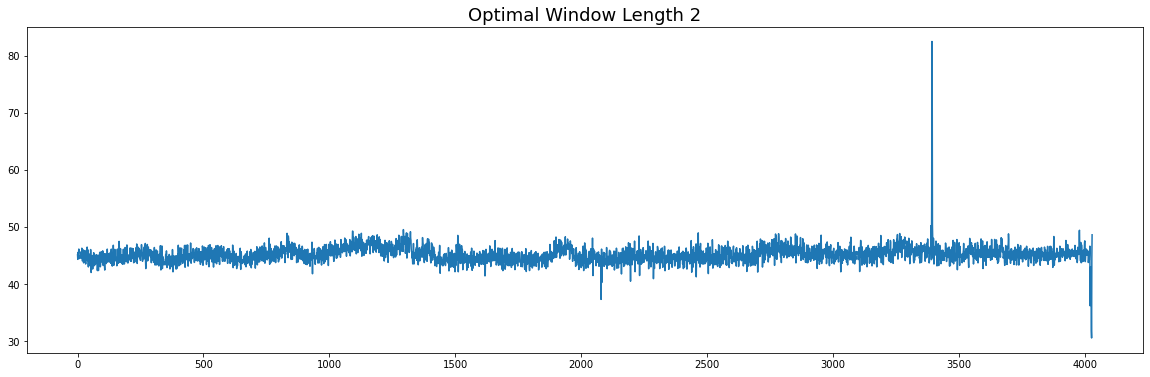

In [38]:
ts_asap('ec2_request_latency_system_failure.csv', start=2, end=1000, step=10, plot=[12, 52, 102, 202, 502])

best window 291


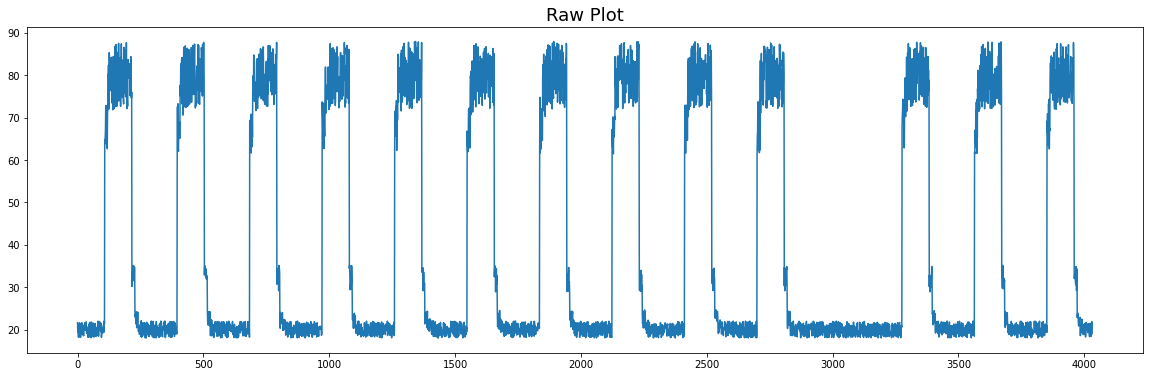

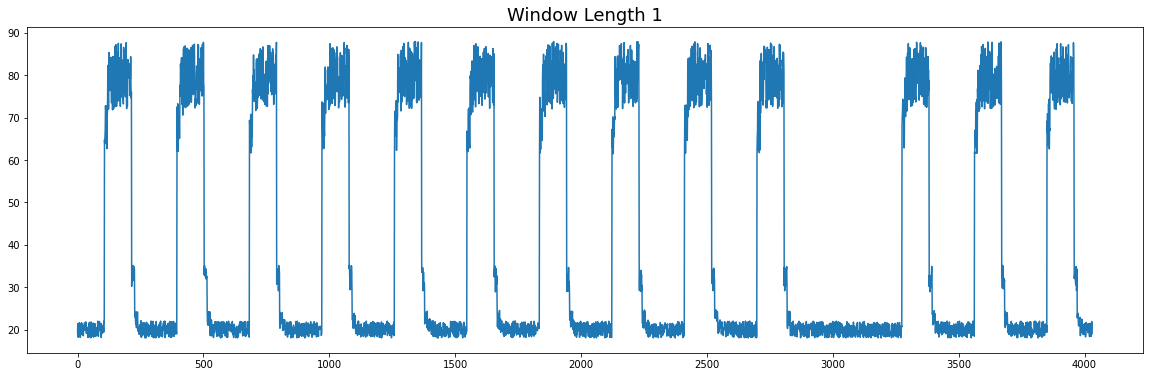

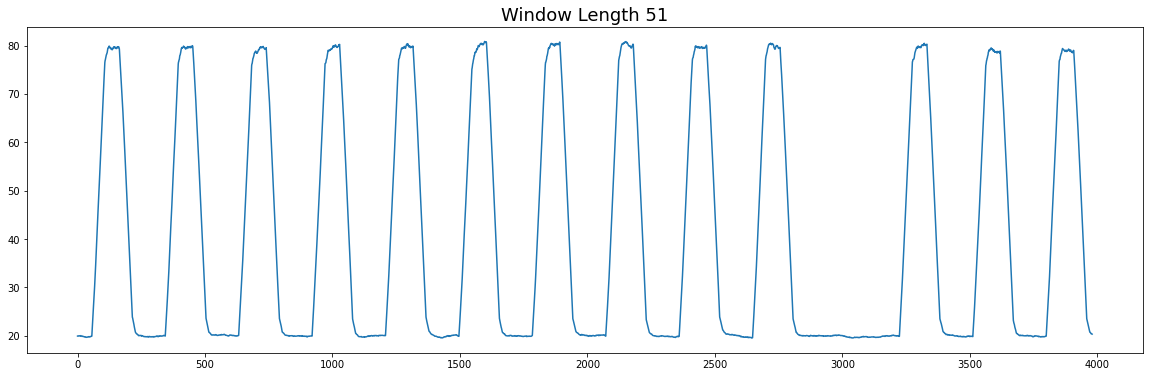

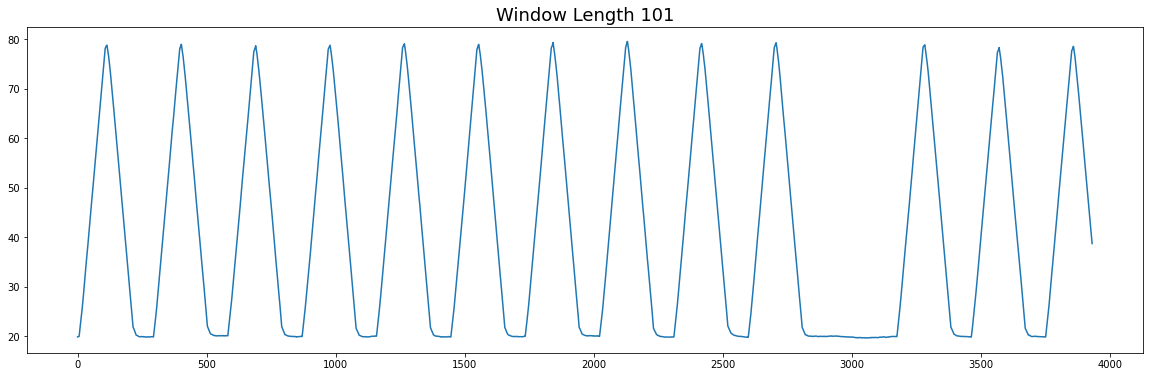

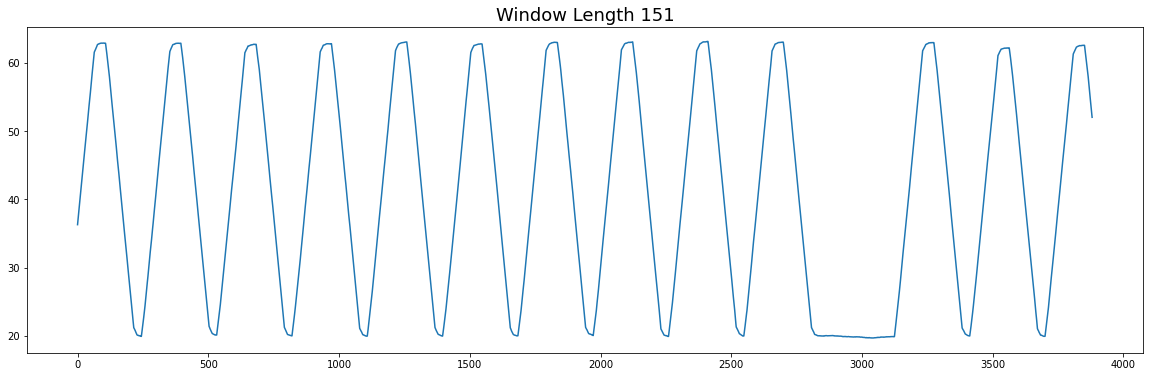

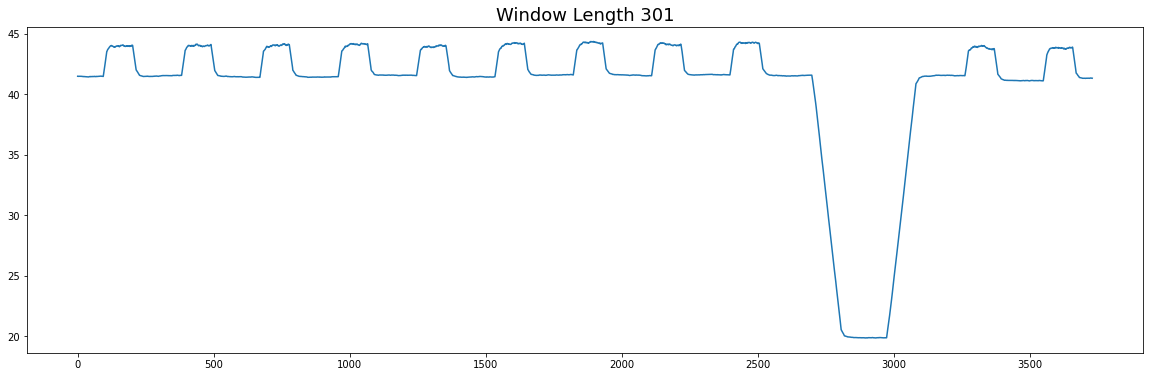

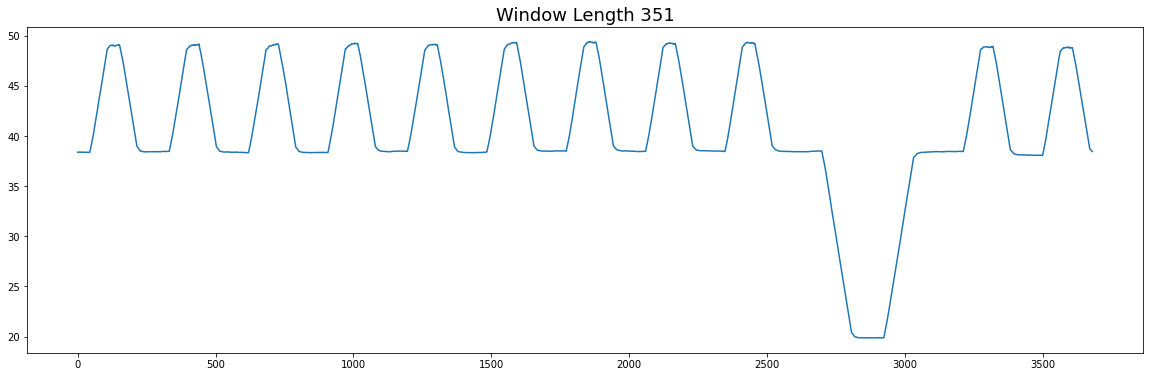

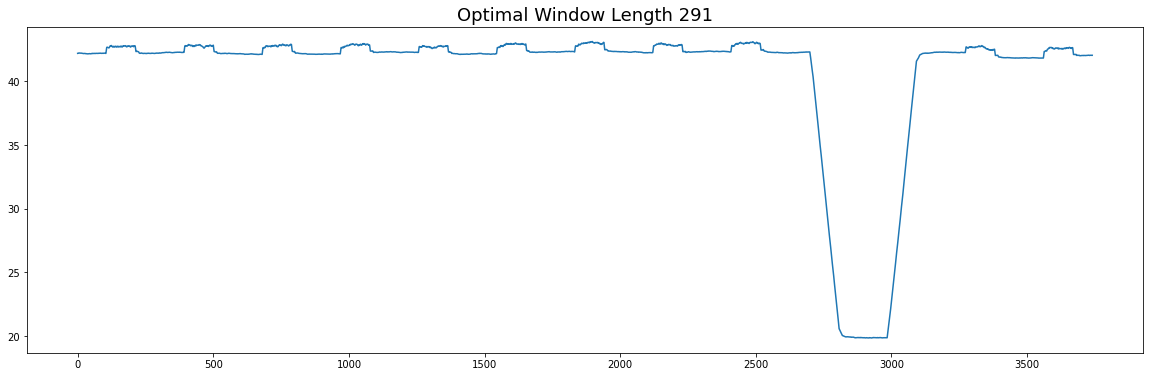

In [40]:
ts_asap('art_daily_nojump.csv', start=1, end=400, step=5, plot=[1, 51, 101, 151, 301, 351])

best window 287


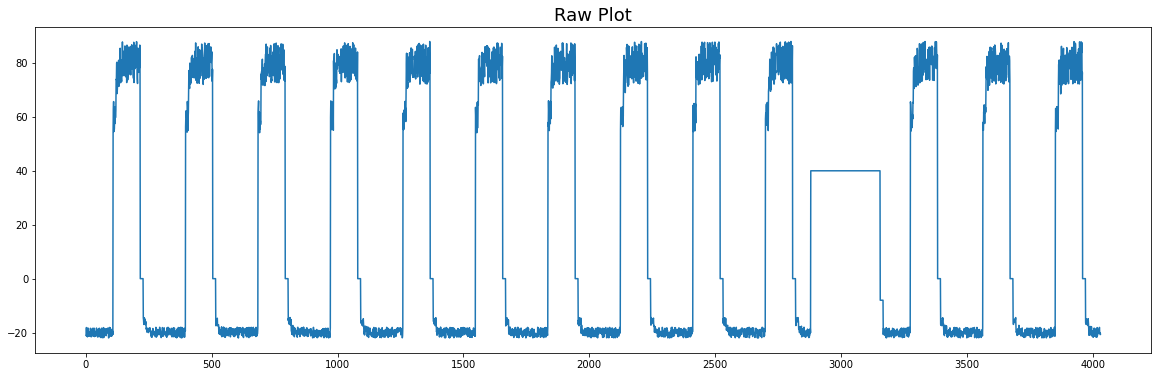

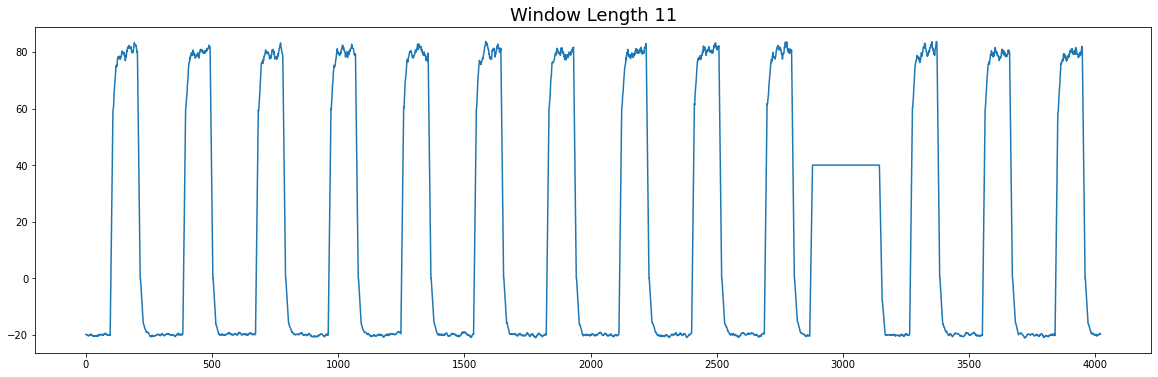

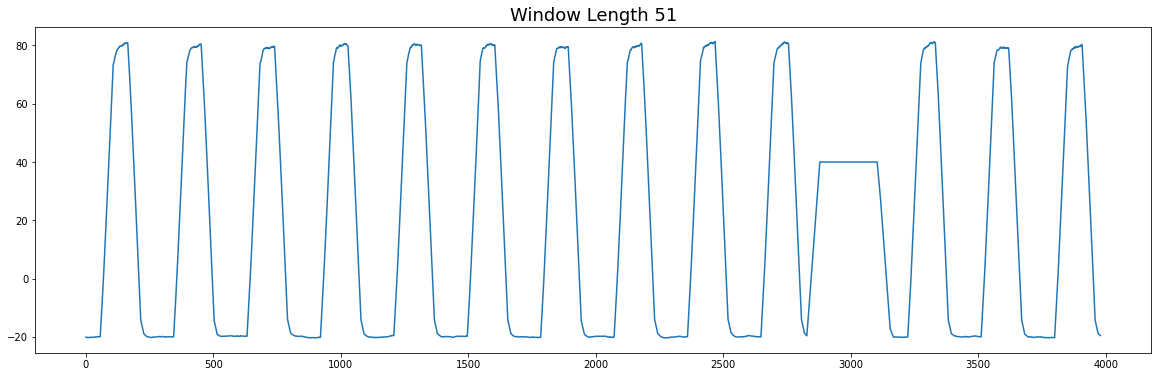

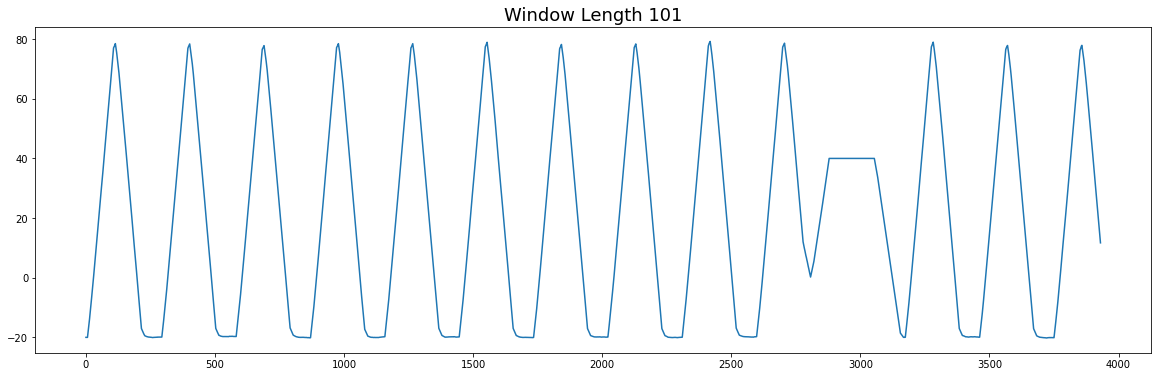

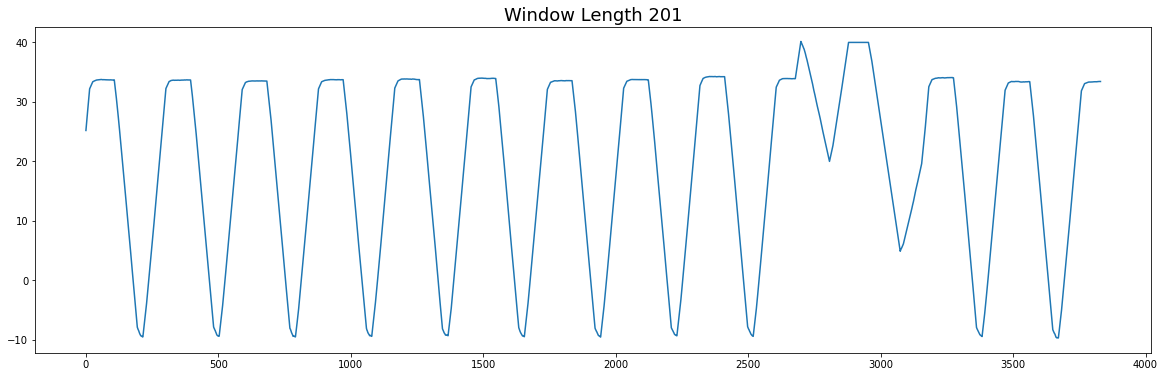

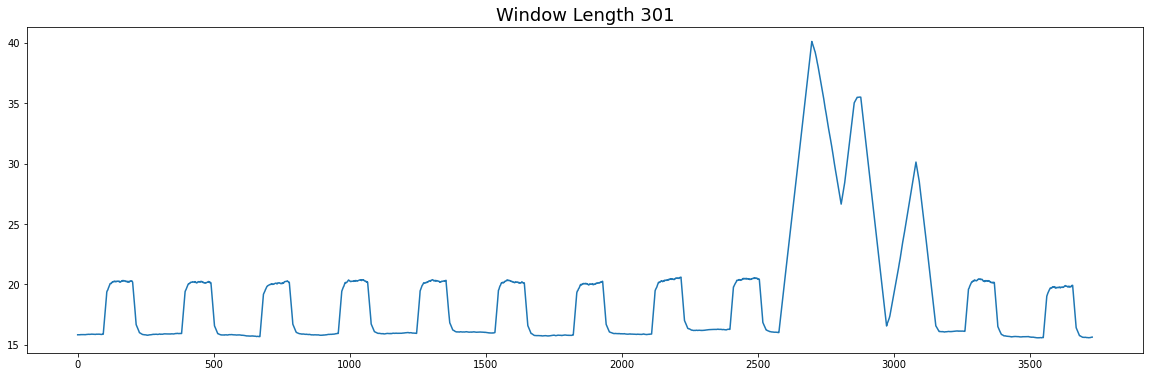

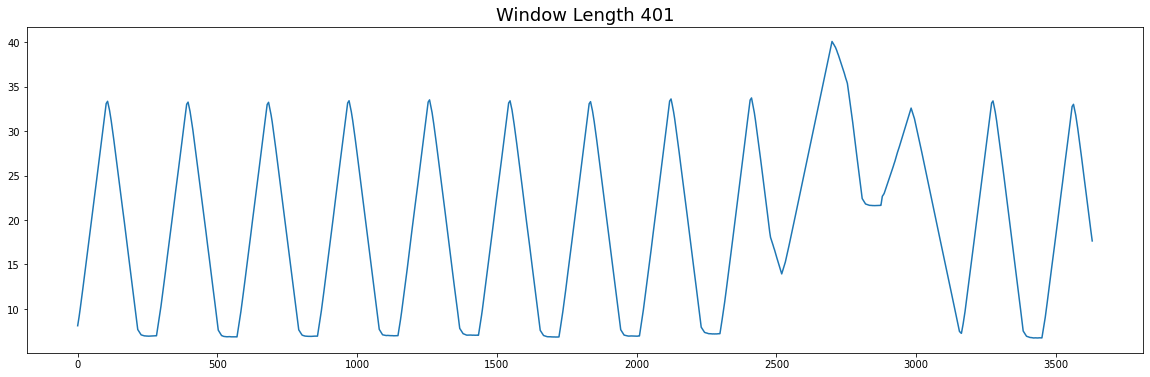

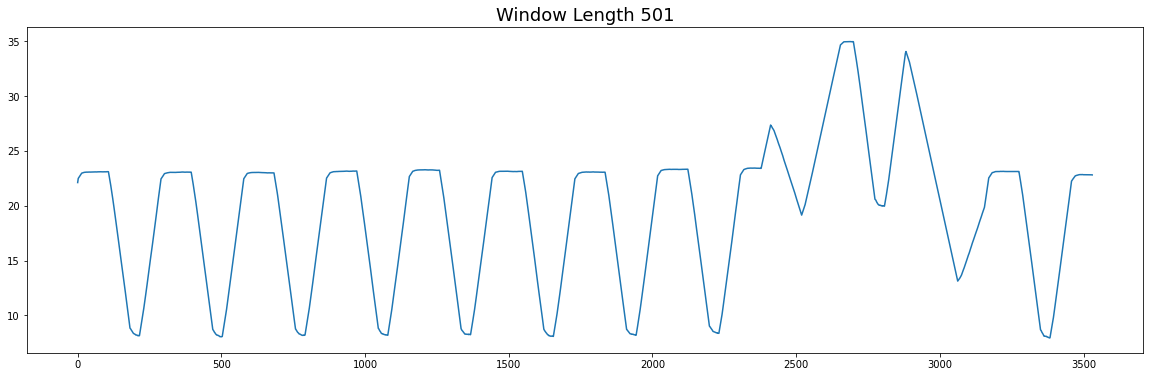

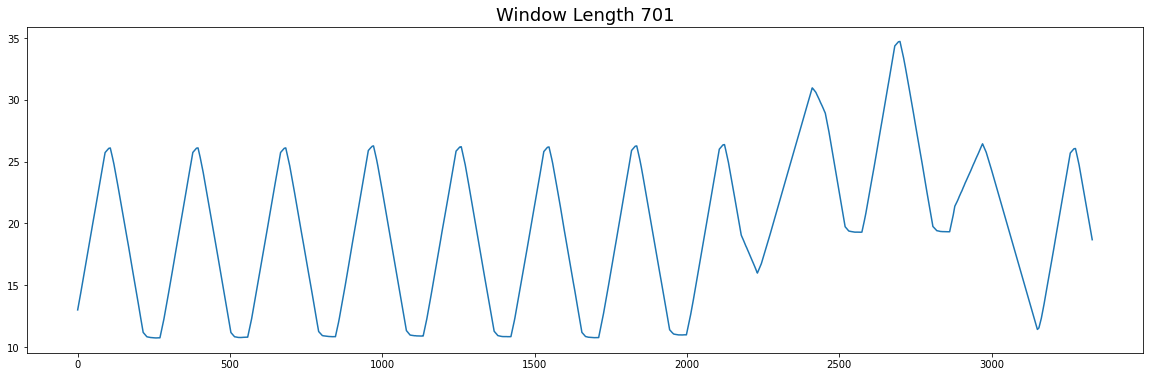

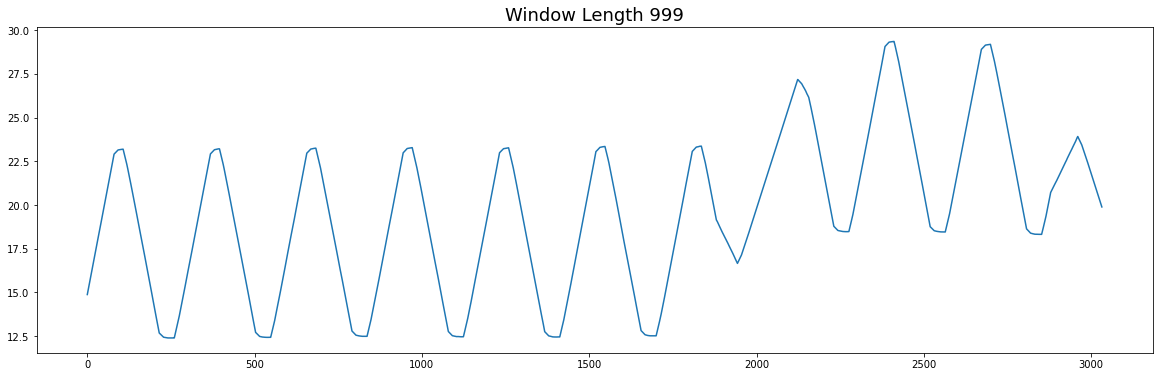

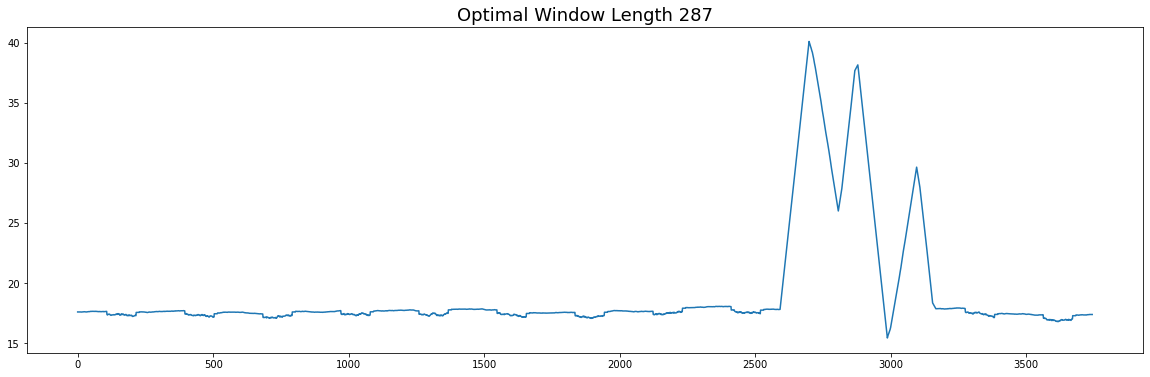

In [41]:
ts_asap('./art_daily_flatmiddle.csv', start=1, end=1000, step=1, plot=[11, 51, 101, 201, 301, 401, 501, 701, 999])

best window 2


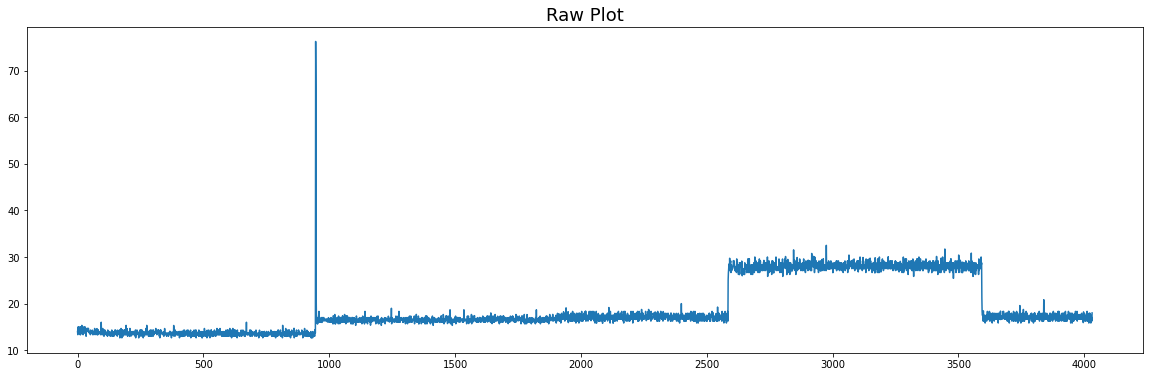

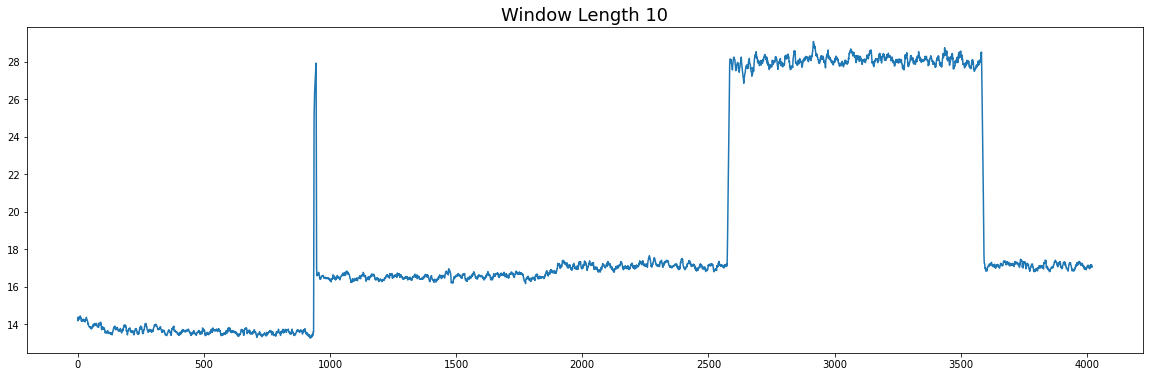

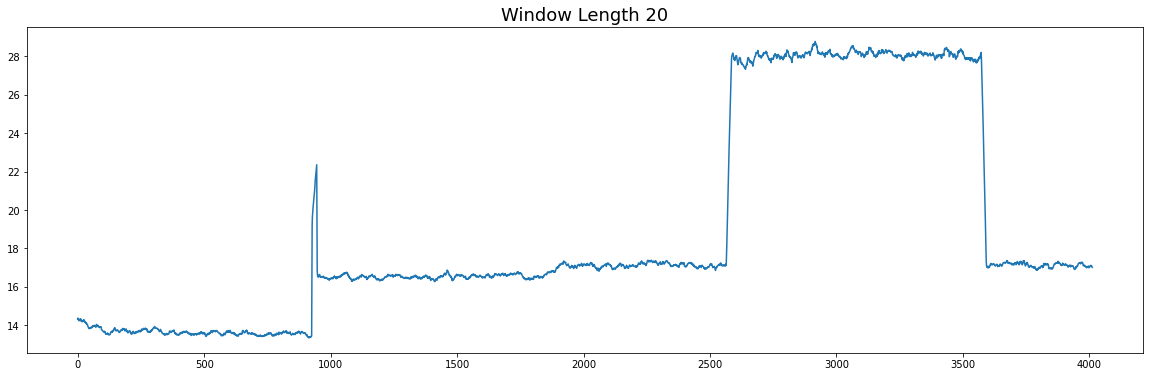

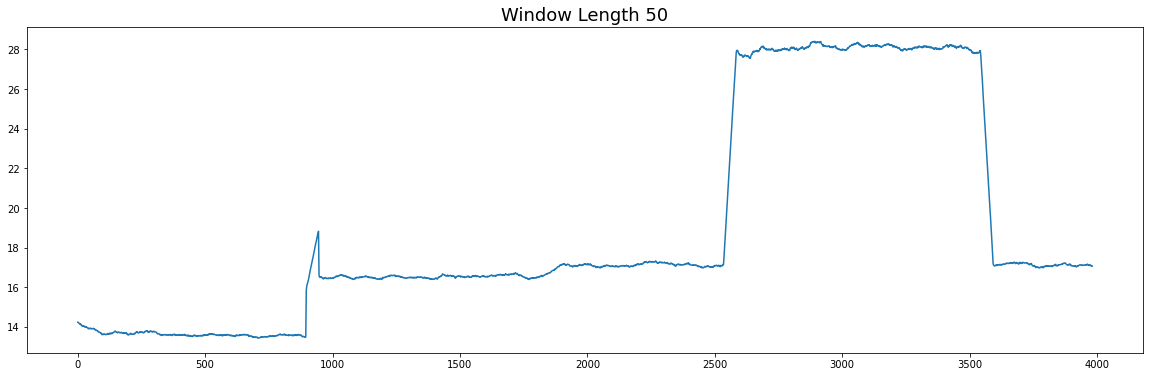

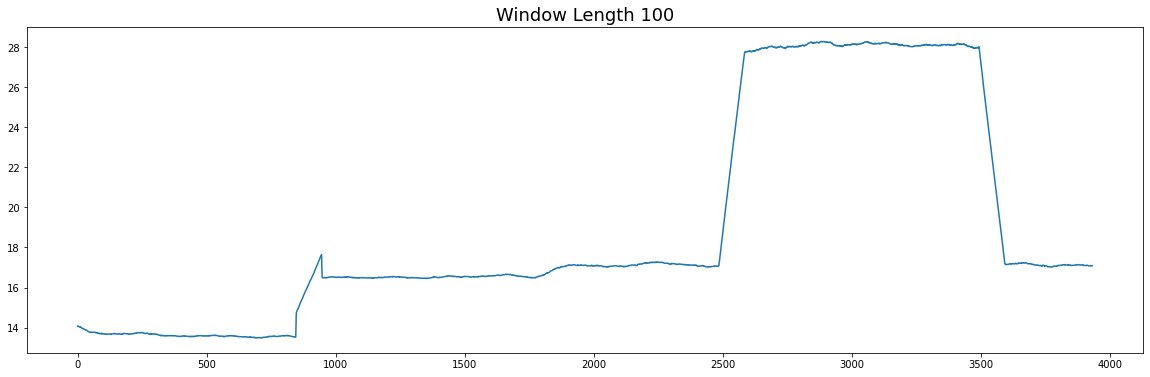

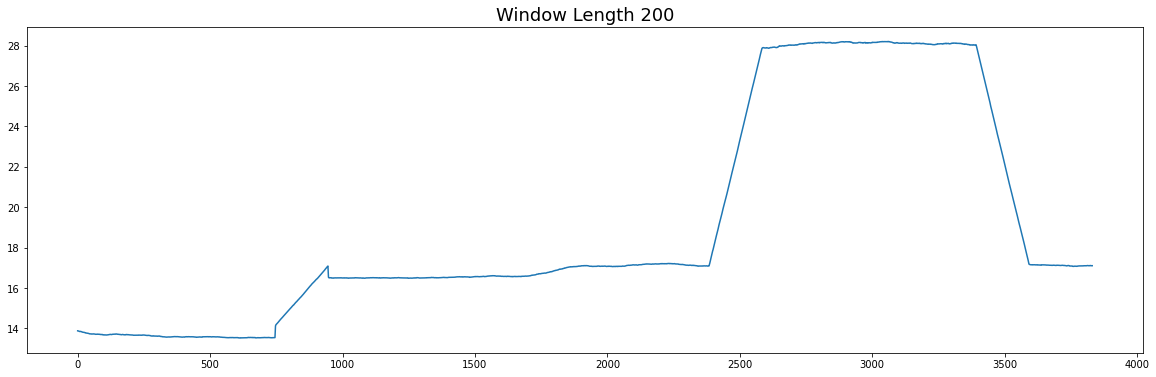

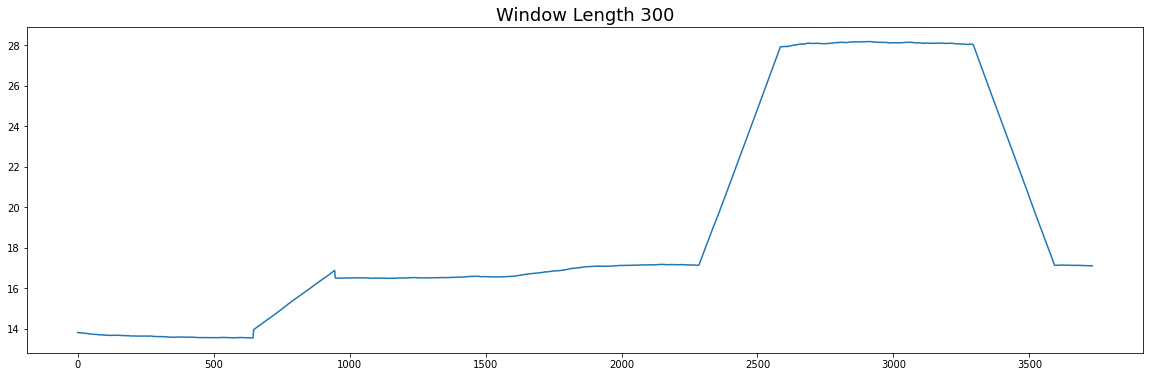

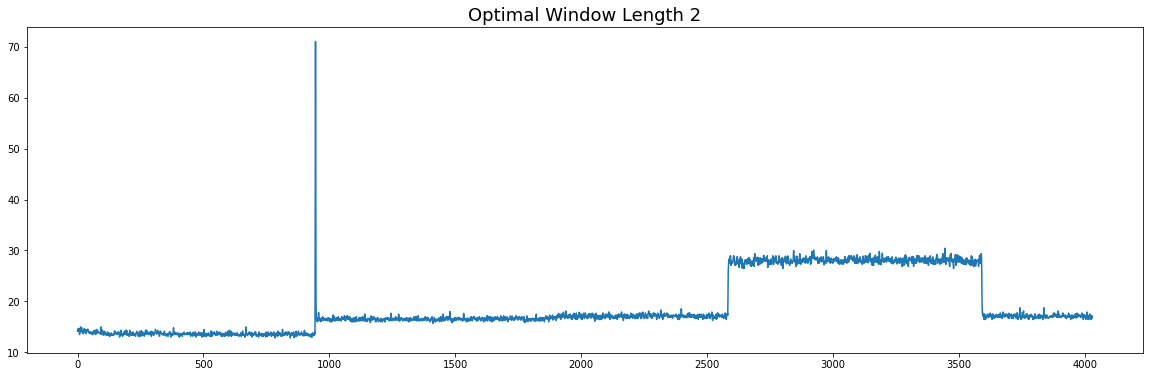

In [45]:
ts_asap('./rds_cpu_utilization_e47b3b.csv', start=2, end=500, step=2, plot=[10, 20, 50, 100, 200, 300, 500])